In [10]:
import numpy as np
import matplotlib.pyplot as plt
import os
import netCDF4
import astropy
import scipy
import calendar
from mpl_toolkits.axes_grid1 import make_axes_locatable
from astropy.convolution import convolve as ap_convolve
from astropy.convolution import Box2DKernel
from matplotlib.axes import Axes
from netCDF4 import num2date
from scipy import stats

In [11]:
def make_plot(data, num, cc, plttitle, vmin_val, vmax_val):
    if num == None:
        fig=plt.imshow(data, origin='lower', cmap=cc, vmin=vmin_val, vmax=vmax_val)
        plt.xticks([0, xhi-xlo], [lonmin, lonmax])
        plt.yticks([0, (yhi-ylo)/2, yhi-ylo], [latmin, ((latmax-latmin)/2)+latmin, latmax])
        plt.tick_params(axis='both', labelsize=7)
        plt.title(plttitle, size=14)
        plt.colorbar(fig)
    else:
        ax=plt.subplot(num)
        fig=plt.imshow(data, origin='lower', cmap=cc, vmin=vmin_val, vmax=vmax_val)
        plt.xticks([0, xhi-xlo], [lonmin, lonmax])
        plt.yticks([0, (yhi-ylo)/2, yhi-ylo], [latmin, ((latmax-latmin)/2)+latmin, latmax])
        ax.tick_params(axis='both', labelsize=7)
        plt.title(plttitle, size=10)

        # Make colorbar lined up with figure and resize label
        divider=make_axes_locatable(ax)
        cax=divider.append_axes("right", size="5%", pad=0.05)
        cbar=plt.colorbar(fig, cax=cax)
        ticklabs=cbar.ax.get_yticklabels()
        cbar.ax.set_yticklabels(ticklabs, fontsize=7)

In [12]:
def extract_data(file):
    # Extract data from file
    sst=file['analysed_sst']
    date_num = file['time'][:]
    units = file.variables['time'].units
    date = num2date(date_num, units)[0]
    date = str(date)
    date = date[:10]

    # Extract a subregion
    sstReg=sst[0, ylo:yhi, xlo:xhi]-273.

    # Extract coordinate data
    lat = file.variables['lat']
    lon = file.variables['lon']
    latmin = (ylo/100) + lat.valid_min
    lonmin = (xlo/100) + lon.valid_min
    latmax = (yhi/100) + lat.valid_min
    lonmax = (xhi/100) + lon.valid_min
    file_info = (sstReg, date, latmin, lonmin, latmax, lonmax)
    return file_info

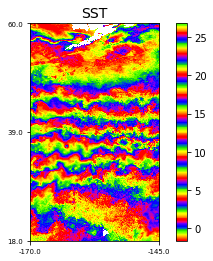

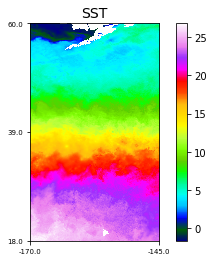

<Figure size 432x288 with 0 Axes>

In [18]:
os.chdir('/nfs/cnhlab003/cnh/mur-sst')

# Choose x and y range
yhi = 15000
ylo = 10800
xhi = 3500
xlo = 1000

tFile = netCDF4.Dataset('20130109090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc')
tFile_info=extract_data(tFile)
sstReg, date=tFile_info[0], tFile_info[1]
latmin, lonmin=tFile_info[2], tFile_info[3]
latmax, lonmax=tFile_info[4], tFile_info[5]

# Save SST files
make_plot(sstReg, None, 'prism', 'SST', None, None)
os.chdir('/home/culberta/sample-figs')
plt.savefig('SST-prism.png', dpi=200)
plt.show()
plt.clf()
os.chdir('/nfs/cnhlab003/cnh')
make_plot(sstReg, None, 'gist_ncar', 'SST', None, None)
os.chdir('/home/culberta/sample-figs')
plt.savefig('SST-gist.png', dpi = 200)
plt.show()
plt.clf()
os.chdir('/nfs/cnhlab003/cnh')